# Dataset visualisation and  cleaning

<div class="alert alert-block alert-success"><b> Data cleaning </b> can be a tedious task. 
According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data. ok.
</div>

## Dataset description and visualisation

<div class="alert alert-block alert-success">
Data visualization is an essential aspect of data analysis that focuses on visually representing data. It provides a visual summary that aids in
processing and understanding information through images, maps, and graphs, simplifying observation, analysis, and comprehension. This is
particularly beneficial for large datasets, where manual processing can be tedious. Moreover, it helps highlight trends, patterns, and outliers.
Python offers a variety of libraries for data visualization, including Plotly, Matplotlib, and Seaborn.
</div>

<div class="alert alert-block alert-warning">Hepatitis is an inflammation of the liver. Most hepatitis patients are often asymptomatic. The Hepatitis dataset contains records of hepatitis cases in individuals and predicts patient survivability. For more details on this dataset, visit: https://archive.ics.
uci.edu/dataset/46/hepatitis <div>

<div class="alert alert-block alert-danger">
    
1. Import the Hepatitis dataset 
2. Print the first 10 samples
3. Print 3 random samples
4. Print the last 5 samples
5. Display the following information about the dataset: columns, number of missing values in each column, and the type of features, all in one instruction.
5. Display only the columns and their types (whether they are numerical or categorical).
6. Display the number of samples and features.
7. Display statistics for all numerical features: count, mean, standard deviation, quantiles, minimum, and maximum values.
8. Verify if the dataset is balanced using a count and a plot.
9. Using the pandas library, perform a line plot, histogram, and box plot for continuous values only. In the line plot, why is the line graph of the
feature ”protime” not continuous?
<\div>

<b>A standard deviation (or σ) </b> is a measure of how dispersed the data is in relation to the mean.

<b> The median </b> is the middle value in a list ordered from smallest to largest.

<b> 25%, 50%, and 75% </b> present the Q1, Median, and Q3 values. 
![title](fig1.png)

## Dataset cleaning

<div class="alert alert-block alert-success">
Data cleaning is a crucial step in the machine learning process for optimal algorithm performance. It involves identifying and correcting issues such as missing values, duplicates, and irrelevant data to ensure accurate, consistent, high-quality, and error-free datasets. Common techniques used in data cleaning include handling missing values, removing duplicates, data type conversion, and outlier detection.
</div>

### Missing values

<div class="alert alert-block alert-success">
Handling missing data is a critical aspect of data preprocessing in machine learning. Effective strategies include imputing missing values
using statistical methods, removing records with missing values, or employing advanced imputation techniques. Each approach has its advantages and limitations, and choosing the right method is essential
for preventing biases and maintaining the integrity of analyses.
</div>

<div class="alert alert-block alert-danger"> 
    
1. Why is data missing? 
2. Print all samples that contain missing values.
3. Print features that contain missing values.
5. Print samples with features that contain missing values.
6. Identify the number of missing values in each feature.
7. Create a new dataframe from the first one and drop samples containing
missing values.
8. Create a new dataframe from the first one and delete columns contain-
ing missing values. Is deleting missing values a solution?
9. Replace missing values using the mean (for continuous values) or mode
(for categorical values) and print the number of missing values after
imputation.
<div/>

### Outliers

<div class="alert alert-block alert-success">
Outliers are data points that significantly deviate from the norm and can arise from various causes, including errors, anomalies, or data variability. Their presence can negatively impact the performance of machine learning models, making it essential to manage outliers for obtaining accurate results. To address outliers, it is important to identify and manage them effectively by either deciding whether to remove them or transforming them to minimize their impact on analysis.
<div/>

<div class="alert alert-block alert-danger">

1. Find and handle outliers in the data using box plots and the Interquar-
tile Range (IQR).
2. Compute the Interquartile Range (IQR), upper and lower bounds for
both the alkaline phosphate and bilirubin features, and detect outliers.
3. Handle outliers using an automatic method (not mean or median).
<div/>

## Study of correlation and feature selection

<div class="alert alert-block alert-success">
Feature selection is a crucial process in machine learning that involves
automatically identifying the most relevant features in a dataset that
contribute to the decision-making process. Including irrelevant and
highly correlated features can lead to decreased accuracy. This process
also helps to manage high-dimensional data by reducing overfitting,
enhancing model accuracy, and decreasing training time.
<div/>

<div class="alert alert-block alert-danger"> 

1. Drop the feature ”Sex”.
2. Plot the Pearson correlation heatmap to observe the correlation of in-
dependent variables with the output variable.
3. Only select features that have an absolute correlation above 0.5 with
the output variable.
4. Drop the features that are highly correlated with malaise.
5. Should features be correlated?
<div/>

## Data splitting

<div class="alert alert-block alert-success">
Data splitting is the process of dividing a dataset into two or more subsets, typically comprising a training set and a testing set. This ensures that models are trained on one subset of the data (training set) while being evaluated on another (test set), which helps effectively assess their performance and improve generalization. In Python, the scikit-learn library is a popular choice for implementing data splitting, offering various functions and classes to facilitate this essential process.
<div/>

<div class="alert alert-block alert-danger">

1. Split the data into training and test sets using the hold-out and strat-
ified hold-out strategies.
2. Display the number of samples in each class for both strategies in the
training and test sets.
<div/>

count    126.000000
mean     105.325397
std       51.508109
min       26.000000
25%       74.250000
50%       85.000000
75%      132.250000
max      295.000000
Name: alk_phosphate, dtype: float64
Outliers dans alkaline phosphate : 5
Outliers dans bilirubin : 17
Outliers dans alkaline phosphate après Winsorization : 0
Outliers dans bilirubin après Winsorization : 0


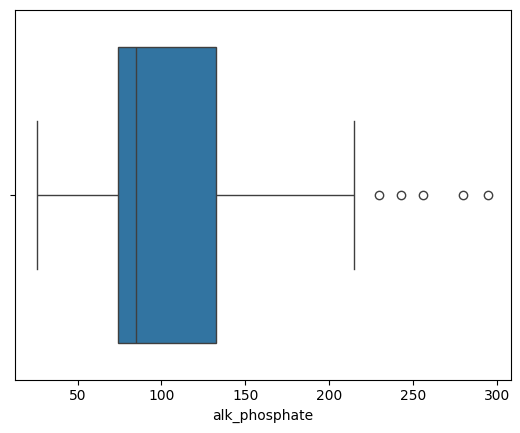

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mstats
import seaborn as sns
from sklearn.model_selection import train_test_split
file_path = 'data/hepatitis.csv'


df = pd.read_csv(file_path)

X = df.drop(columns=['class']) 
y = df['class']  

print(X['alk_phosphate'].describe())

sns.boxplot(x=X['alk_phosphate'])


alkaline_phosphate = X['alk_phosphate']
bilirubin = X['bilirubin']


def calculate_iqr_bounds(data):
  
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound



alk_lower_bound, alk_upper_bound = calculate_iqr_bounds(alkaline_phosphate)
bili_lower_bound, bili_upper_bound = calculate_iqr_bounds(bilirubin)


alk_outliers = (alkaline_phosphate < alk_lower_bound) | (alkaline_phosphate > alk_upper_bound)
bili_outliers = (bilirubin < bili_lower_bound) | (bilirubin > bili_upper_bound)

print(f'Outliers dans alkaline phosphate : {alk_outliers.sum()}')
print(f'Outliers dans bilirubin : {bili_outliers.sum()}')


X['alk_phosphate'] = mstats.winsorize(alkaline_phosphate, limits=[0.25, 0.25])
X['bilirubin'] = mstats.winsorize(bilirubin, limits=[0.25, 0.25])


alk_outliers_after = (X['alk_phosphate'] < alk_lower_bound) | (X['alk_phosphate'] > alk_upper_bound)
bili_outliers_after = (X['bilirubin'] < bili_lower_bound) | (X['bilirubin'] > bili_upper_bound)
# Winsorisation
print(f'Outliers dans alkaline phosphate après Winsorization : {alk_outliers_after.sum()}')
print(f'Outliers dans bilirubin après Winsorization : {bili_outliers_after.sum()}')


# X_cleaned = X[(X.alk_phosphate >= alk_lower_bound) & (X.alk_phosphate <= alk_upper_bound)]

# print(f"Nombre de lignes avant suppression des outliers : {X.shape[0]}")
# print(f"Nombre de lignes après suppression des outliers : {X_cleaned.shape[0]}")





['albumin']


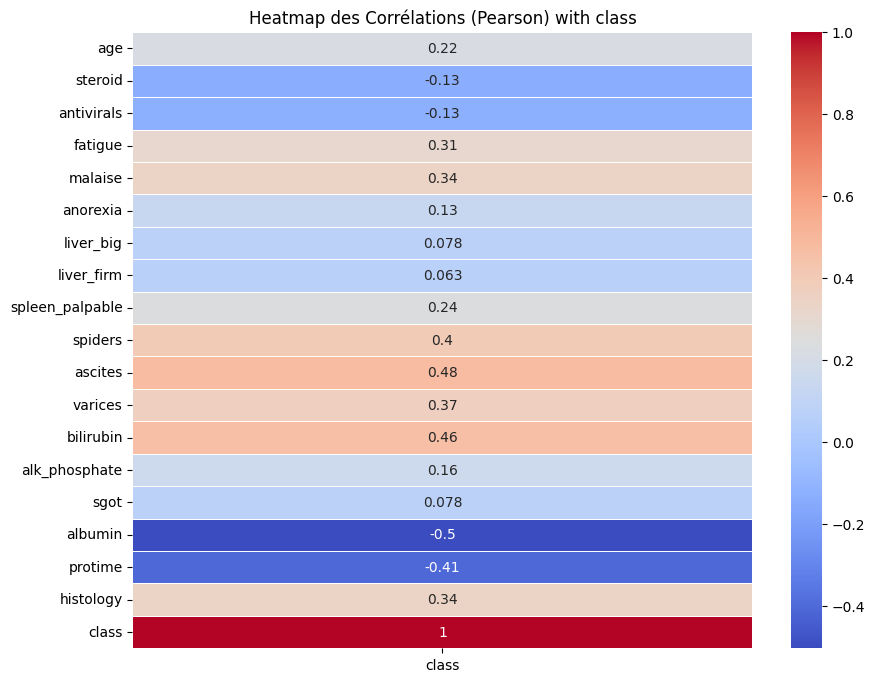

In [6]:
df = df.drop(columns=['sex'])
df['class'] = df['class'].map({'live': 0, 'die': 1})

correlation_matrix = df.corr(method='pearson')
correlation_with_class = correlation_matrix[['class']]

correlation_filtered = correlation_with_class.where(correlation_with_class.abs() > 0.5)

selected_features = correlation_filtered.dropna().index.tolist()
selected_features.remove('class')
print(selected_features)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_class, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des Corrélations (Pearson) with class')
plt.show()

In [7]:
correlation_with_malaise = correlation_matrix['malaise']
highlyCorrelatedFeatures = correlation_with_malaise[correlation_with_malaise.abs() > 0.5].index.tolist()
highlyCorrelatedFeatures.remove('malaise')
df_dropped = df.drop(columns=highlyCorrelatedFeatures)

print("Features supprimées :", highlyCorrelatedFeatures)
print(df_dropped.head())

Features supprimées : ['fatigue', 'anorexia']
   age steroid  antivirals malaise liver_big liver_firm spleen_palpable  \
0   30   False       False   False     False      False           False   
1   50   False       False   False     False      False           False   
2   78    True       False   False      True      False           False   
3   31     NaN        True   False      True      False           False   
4   34    True       False   False      True      False           False   

  spiders ascites varices  bilirubin  alk_phosphate   sgot  albumin  protime  \
0   False   False   False        1.0           85.0   18.0      4.0      NaN   
1   False   False   False        0.9          135.0   42.0      3.5      NaN   
2   False   False   False        0.7           96.0   32.0      4.0      NaN   
3   False   False   False        0.7           46.0   52.0      4.0     80.0   
4   False   False   False        1.0            NaN  200.0      4.0      NaN   

   histology  class  


In [8]:
 # 1. Division Simple (Hold-Out)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Compter le nombre d'échantillons par classe dans les ensembles d'entraînement et de test
train_class_counts = y_train.value_counts()
test_class_counts = y_test.value_counts()
# Afficher les résultats pour la division simple
print("Nombre d'échantillons par classe dans l'ensemble d'entraînement (Hold-Out) :")
print(train_class_counts)
print("\nNombre d'échantillons par classe dans l'ensemble de test (Hold-Out) :")
print(test_class_counts)

# 2. Division Stratifiée (Stratified Hold-Out)
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Compter le nombre d'échantillons par classe dans les ensembles d'entraînement et de test
train_stratified_class_counts = y_train_stratified.value_counts()
test_stratified_class_counts = y_test_stratified.value_counts()
# Afficher les résultats pour la division stratifiée
print("\nNombre d'échantillons par classe dans l'ensemble d'entraînement (Stratified Hold-Out) :")
print(train_stratified_class_counts)
print("\nNombre d'échantillons par classe dans l'ensemble de test (Stratified Hold-Out) :")
print(test_stratified_class_counts)




Nombre d'échantillons par classe dans l'ensemble d'entraînement (Hold-Out) :
class
live    99
die     25
Name: count, dtype: int64

Nombre d'échantillons par classe dans l'ensemble de test (Hold-Out) :
class
live    24
die      7
Name: count, dtype: int64

Nombre d'échantillons par classe dans l'ensemble d'entraînement (Stratified Hold-Out) :
class
live    98
die     26
Name: count, dtype: int64

Nombre d'échantillons par classe dans l'ensemble de test (Stratified Hold-Out) :
class
live    25
die      6
Name: count, dtype: int64
